### Install the necessary packages

In [ ]:
!pip install easyocr

### Download the code zip file

In [ ]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/easy-ocr-tutorial/easy-ocr-tutorial.zip
!unzip -qq easy-ocr-tutorial.zip
%cd easy-ocr-tutorial

### Import Packages

In [2]:
# import the necessary packages
from matplotlib import pyplot as plt
from easyocr import Reader
import argparse
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

In [3]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Using EasyOCR for Optical Character Recognition

In [4]:
def cleanup_text(text):
	# strip out non-ASCII text so we can draw the text on the image
	# using OpenCV
	return "".join([c if ord(c) < 128 else "" for c in text]).strip()

In [19]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True,
#	help="path to input image to be OCR'd")
#ap.add_argument("-l", "--langs", type=str, default="en",
#	help="comma separated list of languages to OCR")
#ap.add_argument("-g", "--gpu", type=int, default=-1,
#	help="whether or not GPU should be used")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "images/sample2.png",
	"langs": "en",
	"gpu": -1
}

In [20]:
# break the input languages into a comma separated list
langs = args["langs"].split(",")
print("[INFO] OCR'ing with the following languages: {}".format(langs))

# load the input image from disk
image = cv2.imread(args["image"])

# OCR the input image using EasyOCR
print("[INFO] OCR'ing input image...")
reader = Reader(langs, gpu=args["gpu"] > 0)
results = reader.readtext(image)

Using CPU. Note: This module is much faster with a GPU.


[INFO] OCR'ing with the following languages: ['en']
[INFO] OCR'ing input image...


[INFO] 0.3138: Co_e
[INFO] 0.5069: Fic~ R+_
[INFO] 0.3022: cr. |, 03
[INFO] 0.0421: Union 0l_Conpany_o{ Callfonle
[INFO] 0.0590: Eeti Ho 2
[INFO] 0.8341: Locatlon:
[INFO] 0.4908: 5 Knb.
[INFO] 0.5626: southuest of Puerto Viejo in SE Linon Province
[INFO] 0.4901: (Ceribbean side)
[INFO] 0.5405: Coata Rice.
[INFO] 0.6074: Coordlnatee:
[INFO] 0.7529: Lat. 98 39'
[INFO] 0.2239: 1"
[INFO] 0.5204: 82' 48'
[INFO] 0.9828: 10"
[INFO] 0.8979: Detes:
[INFO] 0.5200: Conencod:
[INFO] 0.4543: 2/21/55
[INFO] 0.7804: Conpleted:
[INFO] 0.9853: 419/55
[INFO] 0.6309: Statue:
[INFO] 0.5875: D & ^
[INFO] 0.7319: Total Depth:
[INFO] 0.7951: 10,128'
[INFO] 0.3651: fornation unkown 48 yet;
[INFO] 0.5637: Probebly Eocene.
[INFO] 0.9041: Snowa:
[INFO] 0.3550: Ko 01l
[INFO] 0.7310: Or
[INFO] 0.1610: gab]ehovb.
[INFO] 0.4697: DST' 8:
[INFO] 0.9149: None .
[INFO] 0.8963: Location based
[INFO] 0.9737: on:
[INFO] 0.9098: Surfacet
[INFO] 0.2976: Ruerto Viejo Anticllne_
[INFO] 0.7530: Ceneral
[INFO] 0.3964: 5 55"
[INF

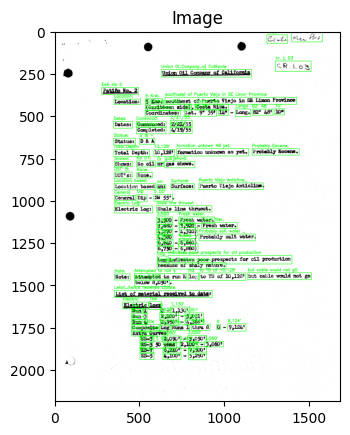

In [23]:
# loop over the results
for (bbox, text, prob) in results:
	# display the OCR'd text and associated probability
	print("[INFO] {:.4f}: {}".format(prob, text))

	# unpack the bounding box
	(tl, tr, br, bl) = bbox
	tl = (int(tl[0]), int(tl[1]))
	tr = (int(tr[0]), int(tr[1]))
	br = (int(br[0]), int(br[1]))
	bl = (int(bl[0]), int(bl[1]))

	# cleanup the text and draw the box surrounding the text along
	# with the OCR'd text itself
	text = cleanup_text(text)
	cv2.rectangle(image, tl, br, (0, 255, 0), 2)
	cv2.putText(image, text, (tl[0], tl[1] - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# show the output image
plt_imshow("Image", image)

In [ ]:
final_string = ''
for text in range(len(results)):
    # concatenate the text 
    final_string += results[text][1] + ' '
#pretty print the final string
print(final_string)

In [5]:
args = {
	"image": "images/sample2.png",
	"langs": "en",
	"gpu": -1
}

# break the input languages into a comma separated list
langs = args["langs"].split(",")
print("[INFO] OCR'ing with the following languages: {}".format(langs))

# load the input image from disk
image = cv2.imread(args["image"])

# OCR the input image using EasyOCR
print("[INFO] OCR'ing input image...")
reader = Reader(langs, gpu=args["gpu"] > 0)
results = reader.readtext(image)



def boxing(image, results):
    for (bbox, text, prob) in results:
        (tl, tr, br, bl) = bbox
        tl = (int(tl[0]), int(tl[1]))
        tr = (int(tr[0]), int(tr[1]))
        br = (int(br[0]), int(br[1]))
        bl = (int(bl[0]), int(bl[1]))

        text = cleanup_text(text)
        cv2.rectangle(image, tl, br, (0, 255, 0), 2)
        cv2.putText(image, text, (tl[0], tl[1] - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
    return image

Using CPU. Note: This module is much faster with a GPU.


[INFO] OCR'ing with the following languages: ['en']
[INFO] OCR'ing input image...


[INFO] 0.3138: Co_e
[INFO] 0.5069: Fic~ R+_
[INFO] 0.3022: cr. |, 03
[INFO] 0.0421: Union 0l_Conpany_o{ Callfonle
[INFO] 0.0590: Eeti Ho 2
[INFO] 0.8341: Locatlon:
[INFO] 0.4908: 5 Knb.
[INFO] 0.5626: southuest of Puerto Viejo in SE Linon Province
[INFO] 0.4901: (Ceribbean side)
[INFO] 0.5405: Coata Rice.
[INFO] 0.6074: Coordlnatee:
[INFO] 0.7529: Lat. 98 39'
[INFO] 0.2239: 1"
[INFO] 0.5204: 82' 48'
[INFO] 0.9828: 10"
[INFO] 0.8979: Detes:
[INFO] 0.5200: Conencod:
[INFO] 0.4543: 2/21/55
[INFO] 0.7804: Conpleted:
[INFO] 0.9853: 419/55
[INFO] 0.6309: Statue:
[INFO] 0.5875: D & ^
[INFO] 0.7319: Total Depth:
[INFO] 0.7951: 10,128'
[INFO] 0.3651: fornation unkown 48 yet;
[INFO] 0.5637: Probebly Eocene.
[INFO] 0.9041: Snowa:
[INFO] 0.3550: Ko 01l
[INFO] 0.7310: Or
[INFO] 0.1610: gab]ehovb.
[INFO] 0.4697: DST' 8:
[INFO] 0.9149: None .
[INFO] 0.8963: Location based
[INFO] 0.9737: on:
[INFO] 0.9098: Surfacet
[INFO] 0.2976: Ruerto Viejo Anticllne_
[INFO] 0.7530: Ceneral
[INFO] 0.3964: 5 55"
[INF

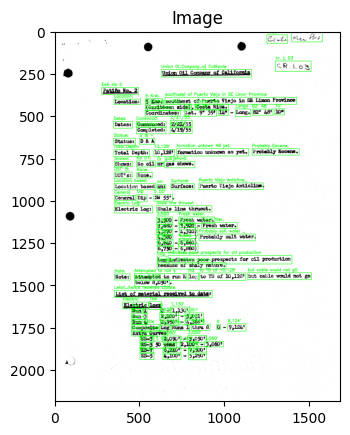

In [6]:
# loop over the results
for (bbox, text, prob) in results:
	# display the OCR'd text and associated probability
	print("[INFO] {:.4f}: {}".format(prob, text))

	# unpack the bounding box
	(tl, tr, br, bl) = bbox
	tl = (int(tl[0]), int(tl[1]))
	tr = (int(tr[0]), int(tr[1]))
	br = (int(br[0]), int(br[1]))
	bl = (int(bl[0]), int(bl[1]))

	# cleanup the text and draw the box surrounding the text along
	# with the OCR'd text itself
	text = cleanup_text(text)
	cv2.rectangle(image, tl, br, (0, 255, 0), 2)
	cv2.putText(image, text, (tl[0], tl[1] - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# show the output image
plt_imshow("Image", image)

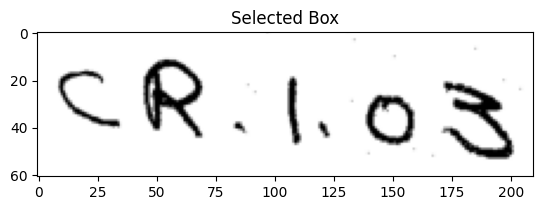

In [10]:
def image_with_box(image, results, index):
    if 0 <= index < len(results):
        (bbox, text, prob) = results[index]
        (tl, tr, br, bl) = bbox
        tl = (int(tl[0]), int(tl[1]))
        tr = (int(tr[0]), int(tr[1]))
        br = (int(br[0]), int(br[1]))
        bl = (int(bl[0]), int(bl[1]))

        cropped_image = image[tl[1]:br[1], tl[0]:br[0]]
        plt_imshow("Selected Box", cropped_image)
    else:
        print("Invalid index")

image_with_box(image, results, 2)